### The Lego Collector's Dilemma

Problem statement:

-> You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.

Why solve this project ?

-> After completing this project, you will have the better understanding of how to build a linear regression model. In this project, you will apply the following concepts.

- Train-test split
- Correlation between the features
- Linear Regression
- MSE and R^2 
- Evaluation Metrics

##### Data loading and splitting

In [1]:
path

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# code starts here

# read the dataset
df = pd.read_csv(path)

# print first five columns
print(df.head())

# store independent variable
X = df.drop('list_price',axis=1)

# store dependent variable
y = df['list_price']

# spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=6)
# code ends here


   ages  list_price  num_reviews  piece_count  play_star_rating  \
0    19       29.99            2          277               4.0   
1    19       19.99            2          168               4.0   
2    19       12.99           11           74               4.3   
3     5       99.99           23         1032               3.6   
4     5       79.99           14          744               3.2   

   review_difficulty  star_rating  theme_name  val_star_rating  country  
0                  0          4.5           0              4.0       20  
1                  2          5.0           0              4.0       20  
2                  2          4.3           0              4.1       20  
3                  0          4.6           1              4.3       20  
4                  1          4.6           1              4.1       20  


##### Predictor Check!

Let's check the scatter_plot for different features vs target variable list_price. This tells us which features are highly correlated with the target variable list_price and help us predict it better.

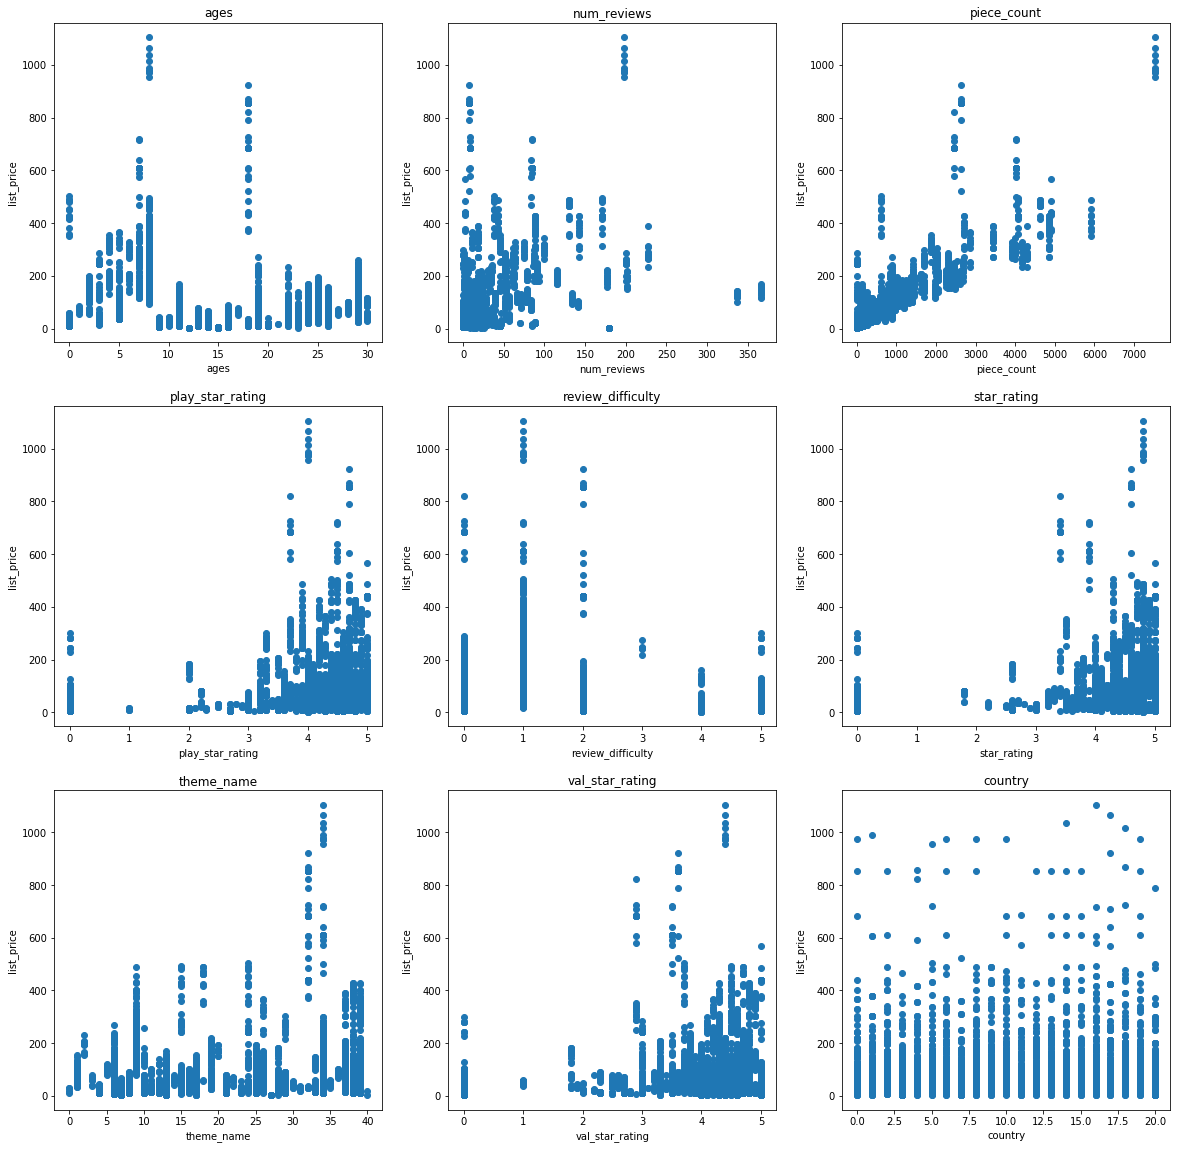

In [6]:
import matplotlib.pyplot as plt

# code starts here        
cols = X_train.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3): 
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(X_train[col],y_train)
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('list_price')
        

# code ends here
plt.show()

##### Reduce feature redundancies!

Features highly correlated with each other adversely affect our lego pricing model. Thus we keep a inter-feature correlation threshold of 0.75. If two features are correlated and with a value greater than 0.75, remove one of them.

In [7]:
# Code starts here

# corr code
corr = X_train.corr()
print(corr)
# drop columns from X_train
X_train.drop(['play_star_rating','val_star_rating'],axis = 1 ,inplace=True)

# drop columns from X_test
X_test.drop(['play_star_rating','val_star_rating'], axis = 1 ,inplace=True)

# Code ends here

                       ages  num_reviews  piece_count  play_star_rating  \
ages               1.000000    -0.160969    -0.090685          0.232847   
num_reviews       -0.160969     1.000000     0.542924          0.151801   
piece_count       -0.090685     0.542924     1.000000          0.174411   
play_star_rating   0.232847     0.151801     0.174411          1.000000   
review_difficulty -0.239683    -0.196846    -0.312239         -0.670508   
star_rating        0.102633     0.160762     0.180903          0.902573   
theme_name         0.476178     0.012342     0.173318          0.151078   
val_star_rating    0.116349     0.172431     0.192863          0.921824   
country           -0.001526     0.001953     0.002506         -0.000958   

                   review_difficulty  star_rating  theme_name  \
ages                       -0.239683     0.102633    0.476178   
num_reviews                -0.196846     0.160762    0.012342   
piece_count                -0.312239     0.180903    0

C:\Users\smparekh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Is my price prediction ok?

Now let's come to the actual task, using linear regression to predict the price. We will check the model accuracy using r^2 score and mse (If model is bad, please keep extra money for the sets!).

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Code starts here

#Instantiate linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred =regressor.predict(X_test)

# Calculate mse
mse = mean_squared_error(y_test, y_pred)

# print mse
print(mse)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)

#print r2
print(r2)

# Code ends here

2106.763431185767
0.7747160273433752


##### Residual check!

Based on the distance between the true target y_test and predicted target y_pred, also known as the residual the cost function is defined. Let's look at the residual and visualize the errors in the model.

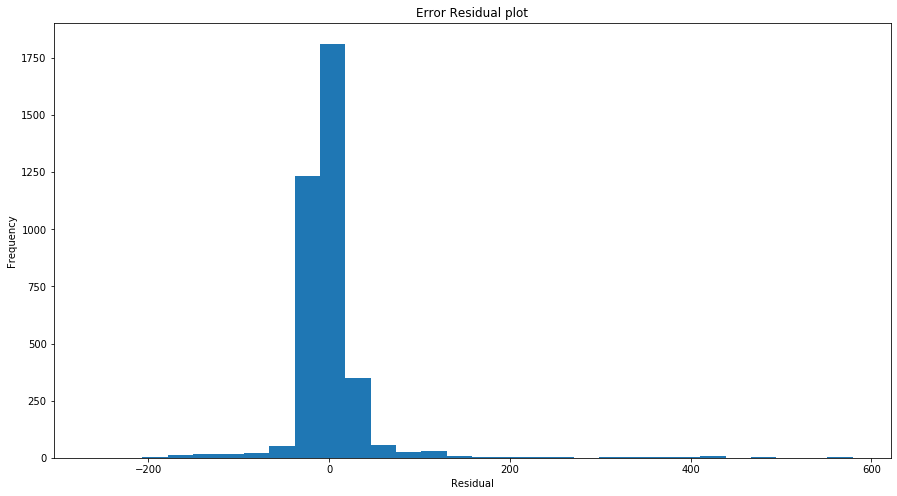

In [9]:
# Code starts here


# calculate the residual
residual = (y_test - y_pred)

# plot the figure for residual
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")   
plt.title("Error Residual plot")
plt.show()

# Code ends here